# Customer booking data

### Loading and inspecting
Import the necessary packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load the customer_booking data in a DataFrame named `bookings` and show the first 5 rows to inspect the DataFrame.

In [2]:
bookings = pd.read_csv("customer_booking.csv")
bookings.head()

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


**Information about the dataframe**
  
  
This dataset contains information about airline bookings, including the number of passengers, sales channel, trip type, purchase lead time, length of stay, flight hour, flight day, route, booking origin, and various flags indicating if the customer wanted extra baggage, preferred seat, or in-flight meals. The dataset also includes the total flight duration and a flag indicating if the booking was completed. This information can be used for various analyses, such as predicting demand, identifying popular routes, and understanding customer preferences.

**Column Description**:
* num_passengers = number of passengers travelling
* sales_channel = sales channel booking was made on
* trip_type = trip Type (Round Trip, One Way, Circle Trip)
* purchase_lead = number of days between travel date and booking date
* length_of_stay = number of days spent at destination
* flight_hour = hour of flight departure
* flight_day = day of week of flight departure
* route = origin -> destination flight route
* booking_origin = country from where booking was made
* wants_extra_baggage = if the customer wanted extra baggage in the booking
* wants_preferred_seat = if the customer wanted a preferred seat in the booking
* wants_in_flight_meals = if the customer wanted in-flight meals in the booking
* flight_duration = total duration of flight (in hours)
* booking_complete = flag indicating if the customer completed the booking

### Completed bookings

Create a new dataframe named `completed_bookings`:
* only containing following columns:  
num_passengers, purchase_lead, length_of_stay, booking_origin, flight_duration and booking_complete
* with only the rows where the booking is completed (1)


In [3]:
completed_bookings = bookings[["num_passengers", "purchase_lead", "length_of_stay", "booking_origin", "flight_duration", "booking_complete"]]
completed_bookings = completed_bookings[completed_bookings["booking_complete"] == 1]

completed_bookings

,num_passengers,purchase_lead,length_of_stay,booking_origin,flight_duration,booking_complete
82,1,15,31,Malaysia,8.83,1
86,1,156,19,Malaysia,8.83,1
94,1,181,87,Singapore,8.83,1
109,1,127,17,Malaysia,8.83,1
122,1,42,17,Malaysia,8.83,1
...,...,...,...,...,...,...
49972,1,33,6,Taiwan,4.67,1
49977,2,15,6,Malaysia,4.67,1
49980,4,242,6,Malaysia,5.00,1
49984,2,7,6,Australia,5.62,1


#### Average purchase lead

Group the average days between booking date and traveling date per country of the booking. Display the countries with the lowest average of days between booking and traveling first and the ones with the most days last.

In [ ]:
countries = completed_bookings[["purchase_lead", "booking_origin"]]

sum = countries.groupby("booking_origin")["purchase_lead"].sum().sort_values() 
count = countries.groupby("booking_origin")["purchase_lead"].count().sort_values()

avg = sum / count

avg.sort_values()




Display the average amount of days between booking date and flight date of Australia.

In [5]:
avg["Australia"]

np.float64(59.986666666666665)

## Purchase lead histogram
Make a histogram (bar plot) of the purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.

**step 1** find the 5 countries with the most bookings and store them in a variable `countries`.

C:\Users\sashk\AppData\Local\Temp\ipykernel_34960\560158181.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  japan = plt.bar(avg_for_most_bookings[0], most_bookings[0], bar_width, color='red', label="Japan")
C:\Users\sashk\AppData\Local\Temp\ipykernel_34960\560158181.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indonesia = plt.bar(avg_for_most_bookings[1], most_bookings[1], bar_width, color='yellow', label="Indonesia")
C:\Users\sashk\AppData\Local\Temp\ipykernel_34960\560158181.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be

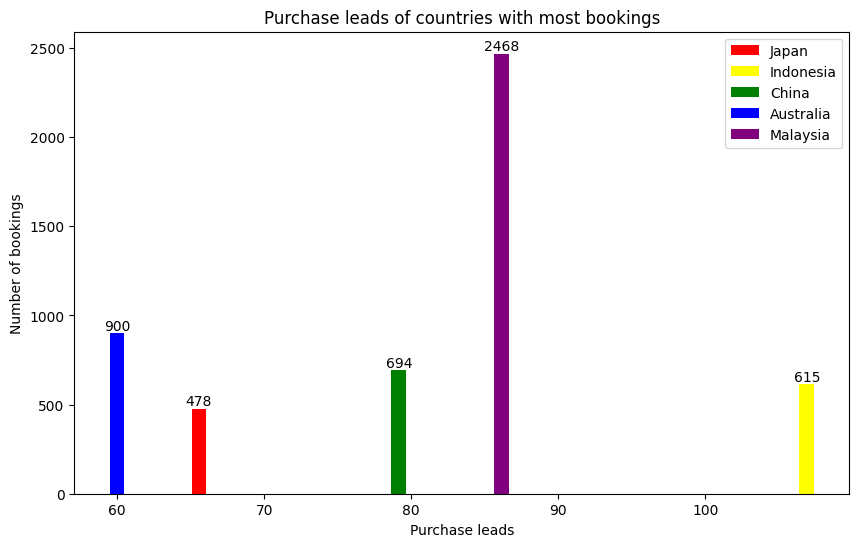

In [6]:
most_bookings = count[-5:]
avg_for_most_bookings = [avg[country] for country in most_bookings.index]


bar_width = 1
plt.figure(figsize=(10, 6))
# bars = plt.bar(avg_for_most_bookings, most_bookings, bar_width, color="red", label=most_bookings.index)
japan = plt.bar(avg_for_most_bookings[0], most_bookings[0], bar_width, color='red', label="Japan")
indonesia = plt.bar(avg_for_most_bookings[1], most_bookings[1], bar_width, color='yellow', label="Indonesia")
china = plt.bar(avg_for_most_bookings[2], most_bookings[2], bar_width, color='green', label="China")
australia = plt.bar(avg_for_most_bookings[3], most_bookings[3], bar_width, color='blue', label="Australia")
malaysia = plt.bar(avg_for_most_bookings[4], most_bookings[4], bar_width, color='purple', label="Malaysia")
plt.legend()

plt.title("Purchase leads of countries with most bookings")
plt.bar_label(japan)
plt.bar_label(indonesia)
plt.bar_label(china)
plt.bar_label(australia)
plt.bar_label(malaysia)
plt.xlabel("Purchase leads")
plt.ylabel("Number of bookings")
plt.show()









**step 2** Create a barplot for every country. Ensure you use appropriate labels and a legend.

<BarContainer object of 58 artists>

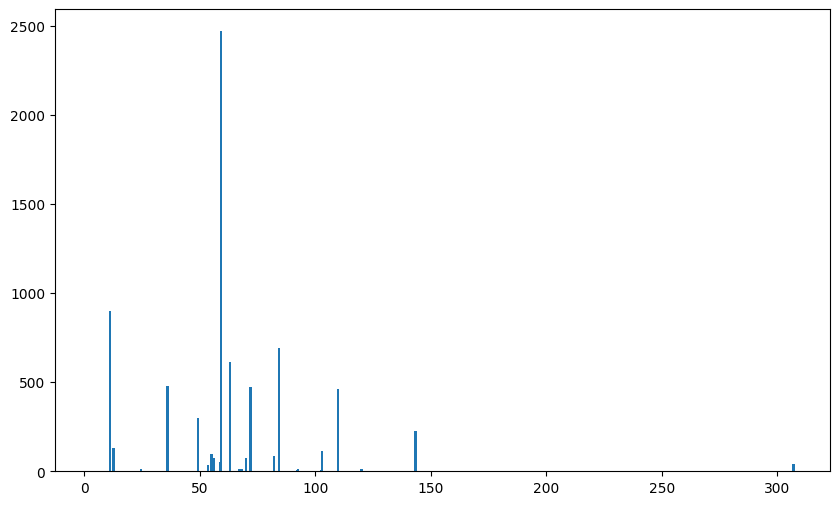

In [7]:
plt.figure(figsize=(10, 6))

plt.bar(avg, count, bar_width)


The graph above is not really practical. First of all,  all the bins are very small so it is hard to read. Besides, bars with the same x-value are drawn on top of each other. This causes some bars to be invisible. Furthermore, we have a wide x-axis range with just a few data points above 500.
Let's try to make a cleaner graph.

## Try again
**Assignment**
Make a new histogram (bar plot) of the categorical purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads categories on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.
### Categorizing purchase leads

Let's first categorize the purchase leads using following categories:
purchase lead
* more than 365 days before departure --> early bird
* 365 days or less in advance but more than 183 days in advance --> planner
* Booked more than 90 days prior to departure but at most 183 prior to departure --> seasonal booker
* Booked at most 90 days in advance --> late booker
* less than 2 weeks in advance --> last minute


In [8]:
def person_type(purchase_lead):
    if purchase_lead < 14:
        return "last minute"
    elif purchase_lead <= 90:
        return "late booker"
    elif 90 < purchase_lead <= 183:
        return "seasonal booker"
    elif 183 < purchase_lead <= 365:
        return "planner"
    return "early bird"



Add a new column "purchase_lead_category" in the completed_bookings dataframe containing the corresponding categories.

In [9]:
completed_bookings["purchase_lead_category"] = [person_type(purchase_lead) for purchase_lead in completed_bookings["purchase_lead"]]

completed_bookings

,num_passengers,purchase_lead,length_of_stay,booking_origin,flight_duration,booking_complete,purchase_lead_category
82,1,15,31,Malaysia,8.83,1,late booker
86,1,156,19,Malaysia,8.83,1,seasonal booker
94,1,181,87,Singapore,8.83,1,seasonal booker
109,1,127,17,Malaysia,8.83,1,seasonal booker
122,1,42,17,Malaysia,8.83,1,late booker
...,...,...,...,...,...,...,...
49972,1,33,6,Taiwan,4.67,1,late booker
49977,2,15,6,Malaysia,4.67,1,late booker
49980,4,242,6,Malaysia,5.00,1,planner
49984,2,7,6,Australia,5.62,1,last minute


Store the distinct categories in a variable named `pl_categories`, ordered from "last minute" to "early bird".

In [10]:
# Could be any column in the square brackets; done for the purposes of having only one column.
pl_categories = completed_bookings.groupby("purchase_lead_category")["purchase_lead_category"].count()

pl_categories

purchase_lead_category
early bird          116
last minute        1454
late booker        3844
planner             892
seasonal booker    1172
Name: purchase_lead_category, dtype: int64

### Distinct dataframe top 5 
Create a new dataframe `top_df` containing the data of the top 5 countries with the most bookings.

Tip: use the variable `countries`which you already made.

In [11]:
top_df = [completed_bookings[country] for country in completed_bookings if country in most_bookings.index]

sum_of_top_countries = completed_bookings.groupby("booking_origin")

completed_bookings.drop(completed_bookings["booking_origin"]).mean()

KeyError: "['Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Germany', 'New Zealand', 'Malaysia', 'Malaysia', '(not set)', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Saudi Arabia', 'Singapore', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Qatar', 'Germany', 'New Zealand', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'France', 'United Kingdom', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'United States', 'New Zealand', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'United Kingdom', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'France', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Qatar', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Bangladesh', 'Malaysia', 'Philippines', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'R\\x82union', 'Malaysia', 'New Zealand', 'Thailand', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'United Kingdom', 'Malaysia', 'India', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Indonesia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Switzerland', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Saudi Arabia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Germany', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Saudi Arabia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Singapore', 'Brunei', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Germany', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Qatar', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'United Kingdom', 'Malaysia', 'Malaysia', 'India', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'China', 'China', 'China', 'China', 'United States', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Japan', 'Italy', 'Malaysia', 'Australia', 'Malaysia', 'Australia', 'Australia', 'Australia', 'China', 'China', 'South Korea', 'South Korea', 'Indonesia', 'Japan', 'Australia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Australia', 'Indonesia', 'Australia', 'Taiwan', 'Indonesia', 'Australia', 'Australia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Nepal', 'Nepal', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Australia', 'Singapore', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Australia', 'Australia', 'Australia', 'India', 'India', 'India', 'Australia', 'Australia', 'India', 'Saudi Arabia', 'Indonesia', 'Australia', 'India', 'Australia', 'Australia', 'Australia', 'India', 'Australia', 'India', 'India', 'India', 'Kuwait', 'Australia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Indonesia', 'Malaysia', 'Malaysia', 'Malaysia', 'Brunei', 'Brunei', 'Kenya', 'Brunei', 'Brunei', 'Brunei', 'Brunei', 'Brunei', 'Brunei', 'Brunei', 'Australia', 'Brunei', 'Brunei', 'Brunei', 'Australia', 'Philippines', 'Australia', 'Brunei', 'China', 'China', 'Australia', 'China', 'China', 'China', 'Australia', 'Australia', 'Australia', 'China', 'China', 'China', 'China', 'China', 'Australia', 'China', 'India', 'India', 'India', 'India', 'India', 'Australia', 'India', 'India', 'Australia', 'India', 'India', 'Spain', 'Australia', 'India', 'Australia', 'Australia', 'Australia', 'Australia', 'Philippines', 'Philippines', 'Australia', 'Australia', 'United States', 'Sweden', 'Australia', 'United Kingdom', 'Australia', 'Australia', 'Sweden', 'Sweden', 'Australia', 'Philippines', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Philippines', 'Indonesia', 'China', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Malaysia', 'Indonesia', 'Indonesia', 'Singapore', 'France', 'Indonesia', 'Indonesia', 'Indonesia', 'Singapore', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Japan', 'Indonesia', 'Japan', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Saudi Arabia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Japan', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Switzerland', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'United States', 'Indonesia', 'Indonesia', 'Indonesia', 'Australia', 'Australia', 'Indonesia', 'Australia', 'Australia', 'Australia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Australia', 'Indonesia', 'Indonesia', 'Australia', 'Indonesia', 'Australia', 'Australia', 'Australia', 'Indonesia', 'Australia', 'Australia', 'Australia', 'Australia', 'Indonesia', 'Australia', 'Indonesia', 'Australia', 'Australia', 'China', 'China', 'Indonesia', 'Indonesia', 'Indonesia', 'China', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'South Korea', 'South Korea', 'South Korea', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'China', 'China', 'Singapore', 'China', 'China', 'China', 'China', 'China', 'Indonesia', 'China', 'China', 'Indonesia', 'Australia', 'Indonesia', 'Indonesia', 'Australia', 'Australia', 'Indonesia', 'Australia', 'Australia', 'Kuwait', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Australia', 'Indonesia', 'Indonesia', 'Bahrain', 'Indonesia', 'Taiwan', 'Taiwan', 'Indonesia', 'Indonesia', 'Singapore', 'Brunei', 'Indonesia', 'Indonesia', 'Indonesia', 'China', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Cambodia', 'Malaysia', 'Malaysia', 'Indonesia', 'Indonesia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Australia', 'China', 'China', 'Japan', 'China', 'China', 'Australia', 'Australia', 'Thailand', 'Japan', 'Japan', 'Thailand', 'Thailand', 'South Korea', 'Thailand', 'Thailand', 'Thailand', 'Australia', 'Australia', 'Thailand', 'Australia', 'Australia', 'Thailand', 'Thailand', 'Australia', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Australia', 'Australia', 'Thailand', 'Thailand', 'Australia', 'Thailand', 'Thailand', 'Thailand', 'Taiwan', 'India', 'China', 'Malaysia', 'China', 'China', 'India', 'Japan', 'Japan', 'Japan', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'India', 'Australia', 'India', 'India', 'Australia', 'Australia', 'Australia', 'Australia', 'India', 'Australia', 'Australia', 'Australia', 'India', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'India', 'Australia', 'Australia', 'Australia', 'Australia', 'India', 'Australia', 'Saudi Arabia', 'Australia', 'Australia', 'India', 'Australia', 'Australia', 'Australia', 'India', 'Australia', 'India', 'India', 'India', 'India', 'Australia', 'Australia', 'India', 'India', 'Australia', 'Indonesia', 'Australia', 'Australia', 'Australia', 'Australia', 'United Arab Emirates', 'Australia', 'Australia', 'Australia', 'Australia', 'India', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'India', 'Australia', 'India', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'United States', 'Philippines', 'Thailand', 'Thailand', 'Thailand', 'Australia', 'Australia', 'Russia', 'Portugal', 'Vietnam', 'Vietnam', 'Singapore', 'Singapore', 'Japan', 'China', 'Malaysia', 'Singapore', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Indonesia', 'Taiwan', 'Australia', 'Brunei', 'Thailand', 'Australia', 'Malaysia', 'China', '(not set)', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Singapore', 'Australia', 'Australia', 'United States', 'Australia', 'India', 'Australia', 'Australia', 'Australia', 'Bangladesh', 'Australia', 'Australia', 'Vietnam', 'South Korea', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Indonesia', 'Indonesia', 'Indonesia', 'Malaysia', 'Malaysia', 'Thailand', 'Australia', 'Australia', 'Australia', 'Philippines', 'United States', 'Philippines', 'Philippines', 'India', 'Philippines', 'Malaysia', 'France', 'Vietnam', 'Vietnam', 'Vietnam', 'China', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'United States', 'Australia', 'Australia', 'Thailand', 'Thailand', 'Australia', 'Thailand', 'Australia', 'Australia', 'Thailand', 'Thailand', 'Australia', 'Thailand', 'Mauritius', 'Thailand', 'Thailand', 'United States', 'Thailand', 'Australia', 'Thailand', 'Thailand', 'Australia', 'Thailand', 'Australia', 'Australia', 'Australia', 'Canada', 'Sweden', 'Australia', 'Australia', 'Thailand', 'Australia', 'Australia', 'Thailand', 'Australia', 'Australia', 'Thailand', 'Australia', 'Australia', 'Thailand', 'Cambodia', 'Australia', 'Australia', 'Australia', 'China', 'Thailand', 'China', 'Thailand', 'Australia', 'Australia', 'Australia', 'Cambodia', 'Thailand', 'Australia', 'Thailand', 'Thailand', 'Thailand', '(not set)', 'Australia', 'Australia', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Australia', 'Australia', 'Australia', 'Switzerland', 'Australia', 'Australia', 'Australia', 'Australia', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Taiwan', 'Thailand', 'China', 'Indonesia', 'Japan', 'Indonesia', 'Japan', 'Indonesia', 'France', 'Japan', 'Indonesia', 'Japan', 'Japan', 'Japan', 'Japan', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Japan', 'Japan', 'Japan', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Thailand', 'Indonesia', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'Indonesia', 'Japan', 'Japan', 'Japan', 'Japan', 'Indonesia', 'Japan', 'Japan', 'United States', 'Indonesia', 'Australia', 'Australia', 'Indonesia', 'China', 'China', 'Russia', 'United States', 'China', 'China', 'Germany', 'China', 'Indonesia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Japan', 'Australia', 'Australia', 'Australia', 'Japan', 'Vietnam', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Australia', 'New Zealand', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Vietnam', 'Vietnam', 'Vietnam', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Australia', 'China', 'Thailand', 'Malaysia', 'United States', 'China', 'China', 'China', 'India', 'China', 'China', 'Australia', 'Australia', 'China', 'Australia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'China', 'Australia', 'China', 'Indonesia', 'China', 'Indonesia', 'China', 'France', 'China', 'Japan', 'China', 'China', 'China', 'Australia', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'China', 'Australia', 'Australia', 'Hong Kong', 'Australia', 'United Kingdom', 'Hong Kong', 'Australia', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'United States', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'United States', 'China', 'Australia', 'Denmark', 'Hong Kong', 'Hong Kong', 'Australia', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Australia', 'Hong Kong', 'Australia', 'Hong Kong', 'France', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'United States', 'China', 'Hong Kong', 'Australia', 'France', 'Thailand', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Thailand', 'Australia', 'Australia', 'United States', 'China', 'Thailand', 'Australia', 'Australia', 'Thailand', 'Thailand', 'Australia', 'Australia', 'Thailand', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Thailand', 'Indonesia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Indonesia', 'Japan', 'Australia', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Malaysia', 'Australia', 'Belgium', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Thailand', 'Japan', 'Laos', 'Vietnam', 'Japan', 'Japan', 'Singapore', 'Japan', 'Singapore', 'Singapore', 'France', 'Singapore', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Japan', 'Indonesia', 'Brunei', 'Japan', 'Indonesia', 'India', 'Australia', 'Australia', 'Australia', 'India', 'India', 'Australia', 'India', 'India', 'Australia', 'Australia', 'India', 'Australia', 'India', 'India', 'United Arab Emirates', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'India', 'Australia', 'India', 'India', 'Australia', 'Australia', 'Australia', 'Malaysia', 'South Korea', 'Singapore', 'Malaysia', 'Singapore', 'Malaysia', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'United Kingdom', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'Indonesia', 'Indonesia', 'South Korea', 'Indonesia', 'Indonesia', 'South Korea', 'South Korea', 'India', 'Australia', 'Australia', 'Australia', 'South Korea', 'Malaysia', 'Australia', 'Australia', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'Malaysia', 'South Korea', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'South Korea', 'Singapore', 'Singapore', 'South Korea', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Australia', 'Australia', 'Australia', 'South Korea', 'South Korea', 'Malaysia', 'Indonesia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'India', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Mauritius', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'Singapore', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Taiwan', 'Malaysia', 'Taiwan', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Japan', 'Indonesia', 'Indonesia', 'Australia', 'China', 'Taiwan', 'Indonesia', 'China', 'Australia', 'Australia', 'Australia', 'Indonesia', 'Malaysia', 'Malaysia', 'Australia', 'Australia', 'China', 'China', 'China', 'China', 'Australia', 'Australia', 'Taiwan', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Australia', 'Singapore', 'Australia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Hong Kong', 'Australia', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'South Korea', 'Vietnam', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Japan', 'Indonesia', 'Malaysia', 'Japan', 'Japan', 'Japan', 'Japan', 'Indonesia', 'Japan', 'India', 'Australia', 'Japan', 'Malaysia', 'Japan', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'United Kingdom', 'Japan', 'Japan', 'Japan', 'Malaysia', 'Japan', 'Malaysia', 'Japan', 'Australia', 'Australia', 'Australia', 'Australia', 'Cambodia', 'Thailand', 'Philippines', 'Japan', 'Myanmar (Burma)', 'Myanmar (Burma)', 'Myanmar (Burma)', 'Japan', 'Germany', 'Vietnam', 'Vietnam', 'Singapore', 'Indonesia', 'Singapore', 'Singapore', 'Singapore', 'Japan', 'Japan', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Japan', 'India', 'Australia', 'Saudi Arabia', 'Australia', 'Indonesia', 'Australia', 'Australia', 'Australia', 'Indonesia', 'China', 'China', 'Indonesia', 'Australia', 'Australia', 'Indonesia', 'Indonesia', 'United Kingdom', 'China', 'Chile', 'Indonesia', 'Australia', 'Australia', 'Indonesia', 'Taiwan', 'Taiwan', 'Indonesia', 'Indonesia', 'Indonesia', 'Taiwan', 'Indonesia', 'Indonesia', 'Indonesia', 'Taiwan', 'China', 'Kazakhstan', 'Australia', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Macau', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Cambodia', 'Vietnam', 'Vietnam', 'Singapore', 'Singapore', 'Singapore', 'Thailand', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'China', 'Australia', 'Taiwan', 'India', 'India', 'India', 'India', 'India', 'India', 'Australia', 'India', 'India', 'Australia', 'Australia', 'Australia', 'Australia', 'India', 'India', 'Australia', 'India', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'India', 'Australia', 'Australia', 'Oman', 'Australia', 'Australia', 'Australia', 'Macau', 'Macau', 'Australia', 'Australia', 'China', 'Macau', 'Macau', 'Macau', 'China', 'Philippines', 'Australia', 'Philippines', 'Philippines', 'Philippines', 'Australia', 'Australia', 'Australia', 'Philippines', 'Philippines', 'Philippines', 'Australia', 'Philippines', 'Australia', 'Philippines', 'Philippines', 'Philippines', 'Australia', 'Philippines', 'Brunei', 'Philippines', 'Philippines', 'Australia', 'Philippines', 'Philippines', 'Oman', 'Philippines', 'Philippines', 'Australia', 'Philippines', 'Philippines', 'Australia', 'Philippines', 'Australia', 'Australia', 'Australia', 'Philippines', 'Philippines', 'Thailand', 'Philippines', 'Philippines', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Australia', 'Thailand', 'China', 'China', 'China', 'Australia', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Australia', 'Australia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Australia', 'Australia', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Australia', 'Australia', 'Cambodia', 'Australia', 'Cambodia', 'Cambodia', 'Australia', 'Australia', 'Australia', 'Australia', 'China', 'China', 'China', 'China', 'Australia', 'United States', 'Cambodia', 'Australia', 'Australia', 'Australia', 'Myanmar (Burma)', 'Myanmar (Burma)', 'Myanmar (Burma)', 'Indonesia', 'Australia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Australia', 'Australia', 'Vietnam', 'Vietnam', 'Vietnam', 'Australia', 'Vietnam', 'Australia', 'Vietnam', 'Vietnam', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Vietnam', 'Vietnam', 'Vietnam', 'Vietnam', 'Vietnam', 'Vietnam', 'Vietnam', 'Australia', 'Vietnam', 'Vietnam', 'Australia', 'Malaysia', 'Indonesia', 'Australia', 'Australia', 'Indonesia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Taiwan', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'United States', 'China', 'Australia', 'Macau', 'Macau', 'Philippines', 'Australia', 'Australia', 'Australia', 'Australia', 'Philippines', 'Philippines', 'Australia', 'Australia', 'United States', 'Philippines', 'Australia', 'Philippines', 'Philippines', 'Philippines', 'Australia', 'Australia', 'Philippines', 'Philippines', 'Philippines', 'Philippines', 'Philippines', 'Philippines', 'Philippines', 'Australia', 'Australia', 'China', 'Singapore', 'Australia', 'Australia', 'Australia', 'Brunei', 'Malaysia', 'Brunei', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Australia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Australia', 'Cambodia', 'Cambodia', 'Cambodia', 'Australia', 'Australia', 'Australia', 'China', 'China', 'Australia', 'Myanmar (Burma)', 'Australia', 'Myanmar (Burma)', 'Australia', 'Malaysia', 'Australia', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Vietnam', 'Vietnam', 'Australia', 'Australia', 'Vietnam', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Norway', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Laos', 'Laos', 'Australia', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'China', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'China', 'China', 'China', 'Malaysia', 'Singapore', 'Singapore', 'China', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'China', 'China', 'Indonesia', 'China', 'China', 'China', 'China', 'United States', 'Romania', 'China', 'China', 'China', 'China', 'Australia', 'Russia', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'China', 'Malaysia', 'Italy', 'China', 'Malaysia', 'Malaysia', 'China', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'France', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Australia', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Australia', 'Taiwan', 'Taiwan', 'United States', 'Malaysia', 'Taiwan', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'Cambodia', 'Australia', 'Australia', 'Cambodia', 'Australia', 'Cambodia', 'Australia', 'Australia', 'China', 'Australia', 'Australia', 'China', 'Australia', 'Myanmar (Burma)', 'Australia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Singapore', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'China', 'China', 'United States', 'Malaysia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'India', 'China', 'Australia', 'Australia', 'Cambodia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Cambodia', 'Cambodia', 'Cambodia', 'Taiwan', 'Indonesia', 'Indonesia', 'Indonesia', 'Singapore', 'India', 'Singapore', 'Singapore', 'Indonesia', 'Australia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'China', 'China', 'Singapore', 'Singapore', 'China', 'China', 'Indonesia', 'Indonesia', 'China', '(not set)', 'Indonesia', 'Indonesia', 'China', 'China', 'China', 'Australia', 'China', 'China', 'China', 'China', 'Australia', 'China', 'China', 'China', 'Australia', 'Australia', 'Malaysia', 'Australia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Taiwan', 'Malaysia', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Vietnam', 'Vietnam', 'Vietnam', 'Australia', 'Australia', 'Vietnam', 'Vietnam', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Australia', 'United States', 'New Zealand', 'Vietnam', 'Australia', 'Vietnam', 'Vietnam', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Vietnam', 'Australia', 'Singapore', 'Seychelles', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'China', 'Indonesia', 'Australia', 'Indonesia', 'Taiwan', 'China', 'Singapore', 'China', 'Australia', 'Taiwan', 'Australia', 'United States', 'India', 'Australia', 'Laos', 'Laos', 'Malaysia', 'China', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Indonesia', 'Japan', 'Indonesia', 'Japan', 'Japan', 'Malaysia', 'South Korea', 'South Korea', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'South Korea', 'Australia', 'Brunei', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'India', 'Japan', 'Vietnam', 'Japan', 'Malaysia', 'China', 'Australia', 'Vietnam', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Japan', 'Japan', 'Japan', 'Thailand', 'Thailand', 'South Korea', 'Thailand', 'Japan', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'South Korea', 'South Korea', 'South Korea', 'Singapore', 'Singapore', 'United States', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'Singapore', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'China', 'Malaysia', 'Taiwan', 'Japan', 'Japan', 'Myanmar (Burma)', 'Japan', 'Japan', 'Japan', 'India', 'Malaysia', 'Malaysia', 'Indonesia', 'Malaysia', 'Australia', 'India', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Vietnam', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Sweden', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Italy', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Australia', 'Taiwan', 'Malaysia', 'Australia', 'Vietnam', 'Australia', 'United States', 'Taiwan', 'Japan', 'United Kingdom', 'Malaysia', 'Taiwan', 'Malaysia', 'Singapore', '(not set)', 'Indonesia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Indonesia', 'Indonesia', 'Indonesia', 'China', 'Malaysia', 'Malaysia', 'Japan', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Japan', 'Japan', 'Malaysia', 'Japan', 'Nepal', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'United States', 'Brunei', 'Indonesia', 'China', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'South Korea', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Japan', 'Indonesia', 'Indonesia', 'Thailand', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'China', 'Indonesia', 'Japan', 'United States', 'Indonesia', 'Taiwan', 'Indonesia', 'Indonesia', 'Indonesia', 'Singapore', 'Australia', 'Thailand', 'Australia', 'China', 'India', 'India', 'Thailand', 'Japan', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'Philippines', 'Philippines', 'Malaysia', 'Malaysia', 'Malaysia', 'Vietnam', 'Indonesia', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Japan', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'New Zealand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'United Kingdom', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Singapore', 'Thailand', 'Thailand', 'Australia', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Japan', 'Indonesia', 'Japan', 'South Korea', 'South Korea', 'Indonesia', 'South Korea', 'South Korea', 'Japan', 'Japan', 'Japan', 'Japan', 'Australia', 'Australia', 'Indonesia', 'South Korea', 'South Korea', 'China', 'China', 'China', 'China', 'Thailand', 'Malaysia', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Australia', 'Hong Kong', 'China', 'Hong Kong', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Thailand', 'South Korea', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Japan', 'Australia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Malaysia', 'Japan', 'Malaysia', 'Japan', 'Japan', 'Japan', 'Singapore', 'Japan', 'Japan', 'Japan', 'Japan', 'Singapore', 'Japan', 'Indonesia', 'Australia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Australia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'Philippines', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'Malaysia', 'Singapore', 'Singapore', 'Singapore', 'Malaysia', 'Indonesia', 'South Korea', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Indonesia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Japan', 'Japan', 'Australia', 'Japan', 'Japan', 'Malaysia', 'Japan', 'Singapore', 'Japan', 'Japan', 'Malaysia', 'Japan', 'Japan', 'Cambodia', 'Japan', 'Japan', 'Japan', 'Japan', 'Vietnam', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Singapore', 'Japan', 'Singapore', 'Singapore', 'Singapore', 'Japan', 'Australia', 'Japan', 'Malaysia', 'Indonesia', 'United States', 'South Korea', 'South Korea', 'Malaysia', 'United States', 'Taiwan', 'Taiwan', 'India', 'India', 'India', 'India', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Cambodia', 'Malaysia', 'Malaysia', 'Australia', 'Vietnam', 'United Arab Emirates', 'Macau', 'Australia', 'Mauritius', 'Malaysia', 'Brunei', 'Czech Republic', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Indonesia', 'Indonesia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Japan', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', '(not set)', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Australia', 'China', 'Vietnam', 'Vietnam', 'Vietnam', 'Vietnam', 'Malaysia', 'Australia', 'Singapore', 'Singapore', 'South Korea', 'Indonesia', 'Vietnam', 'Vietnam', 'Singapore', 'China', 'Singapore', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Australia', 'Vietnam', 'Malaysia', 'Indonesia', 'Malaysia', 'Cambodia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Thailand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Mexico', 'France', 'Malaysia', 'Malaysia', 'Malaysia', 'Italy', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Australia', 'Australia', 'Indonesia', 'Indonesia', 'Australia', 'Japan', 'Malaysia', 'China', 'China', 'Japan', 'Malaysia', 'Japan', 'Japan', 'Malaysia', 'Japan', 'Japan', 'Germany', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Singapore', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Germany', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Japan', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'China', 'India', 'India', 'India', 'Malaysia', 'Australia', 'Brunei', 'Brunei', 'Brunei', 'Germany', 'United States', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Japan', 'United States', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'South Korea', 'Indonesia', 'South Korea', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Hong Kong', 'Indonesia', 'Hong Kong', 'Australia', 'Singapore', 'Indonesia', 'Indonesia', 'Australia', 'Indonesia', 'Indonesia', 'Indonesia', 'Australia', 'Indonesia', 'Malaysia', 'China', 'China', 'Australia', 'Indonesia', 'Australia', 'Indonesia', 'Indonesia', 'Indonesia', 'Hong Kong', 'Japan', 'Australia', 'Australia', 'Australia', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Thailand', 'Thailand', 'Japan', 'Australia', 'China', 'Bahrain', 'India', 'Australia', 'Australia', 'United Kingdom', 'Australia', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Japan', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Japan', 'Malaysia', 'Japan', 'Japan', 'Singapore', 'China', 'China', 'China', 'China', 'China', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Australia', 'Vietnam', 'Australia', 'Philippines', 'Australia', 'Indonesia', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'India', 'Thailand', 'Thailand', 'South Korea', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Japan', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Australia', 'Thailand', 'Australia', 'Thailand', 'Thailand', 'Australia', 'Australia', 'Australia', 'Thailand', 'Indonesia', 'Thailand', 'Australia', 'Thailand', 'Thailand', 'Australia', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Singapore', 'Thailand', 'Laos', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'China', 'China', 'United States', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Japan', 'Indonesia', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Indonesia', 'Japan', 'Japan', 'Indonesia', 'Japan', 'Indonesia', 'Australia', 'Australia', 'United States', 'Indonesia', 'South Korea', 'South Korea', 'China', 'China', 'China', 'China', 'China', 'Indonesia', 'China', 'China', 'Australia', 'Vanuatu', 'Canada', 'Taiwan', 'China', 'China', 'China', 'Thailand', 'China', 'China', 'Malaysia', 'China', 'China', 'China', 'Malaysia', 'China', 'China', 'Hong Kong', 'Macau', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Australia', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Thailand', 'Japan', 'Japan', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Japan', 'Japan', 'Japan', 'Thailand', 'Australia', 'Australia', 'China', 'China', 'Australia', 'China', 'Indonesia', 'Australia', 'Australia', 'Thailand', 'Thailand', 'China', 'Indonesia', 'Malaysia', 'Japan', 'Japan', 'Japan', 'Qatar', 'Malaysia', 'Indonesia', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Australia', 'Australia', 'Japan', 'Japan', 'Malaysia', 'Japan', 'Thailand', 'Malaysia', 'Japan', 'Japan', 'Japan', 'Malaysia', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Indonesia', 'Japan', 'Japan', 'South Korea', 'Japan', 'Japan', 'Japan', 'Japan', 'Cambodia', 'Cambodia', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Vietnam', 'Japan', 'Japan', 'Japan', 'Singapore', 'Japan', 'Japan', 'Malaysia', 'Singapore', 'Singapore', 'Malaysia', 'Singapore', 'Singapore', 'Japan', 'Singapore', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'Denmark', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'Indonesia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'India', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Indonesia', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', '(not set)', 'South Korea', 'Malaysia', 'Vietnam', 'Hong Kong', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Philippines', 'Malaysia', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Australia', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'South Korea', 'Singapore', 'Malaysia', 'Germany', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Indonesia', 'Japan', 'Indonesia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Singapore', 'Japan', 'China', 'China', 'China', 'United States', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Malaysia', 'Japan', 'Japan', 'Japan', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Cambodia', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Malaysia', 'Malaysia', 'Japan', 'Vietnam', 'Singapore', 'Singapore', 'Japan', 'Singapore', 'Japan', 'Singapore', 'United Kingdom', 'Japan', 'Singapore', 'Singapore', 'Japan', 'Japan', 'Singapore', 'Singapore', 'Indonesia', 'Indonesia', 'Japan', 'Malaysia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'China', 'Indonesia', 'Malaysia', 'Malaysia', 'China', 'Australia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Taiwan', 'Australia', 'Taiwan', 'Taiwan', 'Taiwan', 'United Kingdom', 'Taiwan', 'Taiwan', 'Taiwan', 'France', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Australia', 'Australia', 'India', 'India', 'India', 'Philippines', 'Brunei', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Vietnam', 'Hong Kong', 'Australia', 'Singapore', 'Australia', 'Macau', 'Macau', 'Philippines', 'Philippines', 'Australia', '(not set)', 'Philippines', 'Malaysia', 'South Korea', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Vietnam', 'Hong Kong', 'India', 'Singapore', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'United Kingdom', 'China', 'Malaysia', 'Malaysia', 'Cambodia', 'China', 'Singapore', 'China', 'Malaysia', 'Australia', 'New Zealand', 'Italy', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Philippines', 'South Korea', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'United States', 'China', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Saudi Arabia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Taiwan', 'Taiwan', 'Malaysia', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Malaysia', 'Macau', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Australia', 'Cambodia', 'Malaysia', 'Vietnam', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Cambodia', 'Singapore', 'Indonesia', '(not set)', 'China', 'Singapore', 'Singapore', 'Singapore', 'Indonesia', 'China', 'Indonesia', 'Indonesia', 'China', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Taiwan', 'Taiwan', 'Malaysia', 'Taiwan', 'Vietnam', 'Vietnam', 'Singapore', 'Australia', 'Australia', 'Malaysia', 'Singapore', 'Indonesia', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Singapore', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'New Zealand', 'Vietnam', 'Malaysia', 'Malaysia', 'Malaysia', 'Philippines', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Indonesia', 'South Korea', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Australia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Malaysia', 'Japan', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'Japan', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'China', 'China', 'China', 'Malaysia', 'China', 'China', 'China', 'China', 'China', 'Malaysia', 'China', 'China', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'India', 'India', 'India', 'Malaysia', 'South Korea', 'Malaysia', 'China', 'Australia', 'France', 'France', 'Brunei', 'China', 'China', 'Australia', 'Australia', 'India', 'India', 'Australia', 'China', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Malaysia', 'Indonesia', 'United States', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'South Korea', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Australia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'China', 'Indonesia', 'China', 'Indonesia', 'Indonesia', 'Indonesia', 'Australia', 'Australia', 'Australia', 'South Korea', 'Indonesia', 'United States', 'Malaysia', 'United States', 'Indonesia', 'Australia', 'Australia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Taiwan', 'Indonesia', 'Indonesia', 'Malaysia', 'Indonesia', 'China', 'Japan', 'Japan', 'Australia', 'Thailand', 'Thailand', 'Australia', 'Australia', 'Thailand', 'China', 'Australia', 'Taiwan', 'India', 'India', 'Australia', 'India', 'India', 'Australia', 'Australia', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Malaysia', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'United States', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Malaysia', 'Malaysia', 'Indonesia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Thailand', 'Malaysia', 'China', 'China', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'China', 'China', 'China', 'China', 'Japan', 'Saudi Arabia', 'Philippines', 'Philippines', 'Philippines', 'Philippines', 'Philippines', 'China', 'China', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Japan', 'Japan', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Malaysia', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'United States', 'Australia', 'Denmark', 'Malaysia', 'Greece', 'Thailand', 'Thailand', 'Thailand', 'Malaysia', 'China', 'China', 'China', 'Thailand', 'China', 'China', 'Thailand', 'Thailand', 'Australia', 'Thailand', 'Australia', 'Thailand', 'Australia', 'Thailand', 'Thailand', 'Thailand', 'Australia', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'China', 'Indonesia', 'China', 'China', 'Japan', 'Japan', 'Indonesia', 'Japan', 'Indonesia', 'South Korea', 'Indonesia', 'Indonesia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Indonesia', 'South Korea', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Indonesia', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Indonesia', 'Australia', 'Australia', 'Indonesia', 'China', 'China', 'China', 'China', '(not set)', 'China', 'China', 'China', 'China', 'Japan', 'China', 'China', 'China', 'China', 'Indonesia', 'China', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'China', 'China', 'China', 'China', 'China', 'United States', 'China', 'China', 'China', 'United States', 'China', 'China', 'China', 'Saudi Arabia', 'China', 'China', 'United States', 'China', 'China', 'China', 'China', 'Bahrain', 'China', 'China', 'China', 'South Korea', 'China', 'Indonesia', 'Australia', 'Australia', 'China', 'China', 'Vietnam', 'Vietnam', 'Vietnam', 'Thailand', 'Thailand', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Malaysia', 'China', 'Malaysia', 'Indonesia', 'Hong Kong', 'Hong Kong', 'Australia', 'Hong Kong', 'Australia', 'Australia', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Thailand', 'Japan', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Singapore', 'Japan', 'Australia', 'Australia', 'Australia', 'China', 'United States', 'China', 'China', 'China', 'China', 'China', 'China', 'Thailand', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'China', 'China', 'China', 'China', 'China', 'China', 'Australia', 'Australia', 'Australia', 'Thailand', 'China', 'China', 'China', 'China', 'Malaysia', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Indonesia', 'Japan', 'China', 'Japan', 'Japan', 'Japan', 'Japan', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Japan', 'Japan', 'Cambodia', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Malaysia', 'Vietnam', 'Vietnam', 'Japan', 'Japan', 'Singapore', 'Singapore', 'Singapore', 'Japan', 'Singapore', 'United States', 'Singapore', 'United States', 'Japan', 'Indonesia', 'Japan', 'United States', 'India', 'Australia', 'India', 'India', 'India', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'Malaysia', 'Brunei', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Netherlands', 'Singapore', 'South Korea', 'Malaysia', 'South Korea', 'Romania', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'India', 'South Korea', 'Malaysia', 'South Korea', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Pakistan', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'South Korea', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'United Kingdom', 'Malaysia', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Malaysia', 'Singapore', 'Singapore', 'Taiwan', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'South Korea', 'Indonesia', 'Indonesia', 'Indonesia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Indonesia', 'Indonesia', 'Indonesia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'China', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'China', 'United States', 'China', 'China', 'China', 'China', 'Australia', 'China', 'China', 'China', 'China', 'China', 'China', 'United States', 'China', 'China', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Hong Kong', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Taiwan', 'Australia', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'India', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Japan', 'Cambodia', 'Cambodia', 'Japan', 'Japan', 'Japan', 'Japan', 'United States', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Malaysia', 'Singapore', 'Singapore', 'Japan', 'Singapore', 'Indonesia', 'Indonesia', 'Japan', 'Japan', 'Malaysia', 'Australia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'China', 'Indonesia', 'Indonesia', 'Macau', 'Macau', 'Singapore', 'Singapore', 'United States', 'Indonesia', 'Australia', 'Japan', 'Singapore', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Malaysia', 'China', 'China', 'Australia', 'China', 'Australia', 'China', 'Australia', 'Australia', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'United States', 'China', 'China', 'China', 'Taiwan', 'India', 'India', 'India', 'India', 'India', 'Australia', 'Australia', 'Philippines', 'Australia', 'Australia', 'Australia', 'Malaysia', 'Malaysia', 'Japan', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Australia', 'Australia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Indonesia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Cambodia', 'Australia', 'Australia', 'Australia', 'Malaysia', 'Vietnam', 'Vietnam', 'Vietnam', 'Australia', 'Australia', 'Singapore', 'Singapore', 'Indonesia', 'Malaysia', 'Australia', 'Australia', 'Australia', 'Australia', 'Macau', 'China', 'United Kingdom', 'China', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Brunei', 'Malaysia', 'Brunei', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Vietnam', 'Singapore', 'Saudi Arabia', 'Australia', 'Malaysia', 'Malaysia', 'United States', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'China', 'China', 'Malaysia', 'Malaysia', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Australia', 'Singapore', 'Malaysia', 'Myanmar (Burma)', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'United States', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'China', 'China', 'China', 'China', 'China', 'China', 'United States', 'Malaysia', 'China', 'Malaysia', 'China', 'Malaysia', 'China', 'China', 'China', 'Malaysia', 'China', 'China', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Singapore', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Hong Kong', 'Malaysia', 'Australia', 'Taiwan', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Singapore', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Vietnam', 'Vietnam', 'Vietnam', 'Australia', 'China', 'China', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Australia', 'Cambodia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'China', 'Philippines', 'Germany', 'China', 'China', 'China', 'China', 'China', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Vietnam', 'Vietnam', 'Malaysia', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'New Zealand', 'Singapore', 'Indonesia', 'Indonesia', 'Taiwan', 'India', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'China', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'New Zealand', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Iraq', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Hong Kong', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Italy', 'Italy', 'South Korea', 'Indonesia', 'Japan', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Malaysia', 'South Korea', 'South Korea', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'United States', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Australia', 'Australia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Kazakhstan', 'South Korea', 'Malaysia', 'South Korea', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'India', 'India', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Brunei', 'Brunei', 'Brunei', 'Taiwan', 'Brunei', 'Brunei', 'China', 'China', 'China', 'Australia', 'China', 'India', 'India', 'Indonesia', 'Australia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'United States', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Singapore', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'South Korea', 'Singapore', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'United States', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', '(not set)', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Turkey', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Australia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'China', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'South Korea', 'South Korea', 'South Korea', 'Indonesia', 'Indonesia', 'Indonesia', 'China', 'Indonesia', 'Indonesia', 'Indonesia', 'Italy', 'Malaysia', 'Australia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'China', 'China', 'China', '(not set)', 'China', 'China', 'Sri Lanka', 'Japan', 'China', 'Japan', 'Thailand', 'Australia', 'China', 'China', 'China', 'Australia', 'China', 'Thailand', 'India', 'India', 'Qatar', 'Japan', 'Oman', 'India', 'United Kingdom', 'Australia', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'United States', 'Thailand', 'Thailand', 'Thailand', 'Singapore', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Indonesia', 'Indonesia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Brunei', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Vietnam', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Australia', 'China', 'China', 'China', 'China', 'Singapore', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Australia', 'China', 'China', 'Malaysia', 'China', 'United States', 'China', 'China', 'China', 'China', 'Vietnam', 'Vietnam', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Singapore', 'China', 'China', 'New Zealand', 'China', 'Australia', 'Vietnam', 'Philippines', 'United Kingdom', 'Philippines', 'Cambodia', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Hong Kong', 'Thailand', 'Thailand', 'Thailand', 'Hong Kong', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Japan', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Australia', 'Australia', 'Thailand', 'United Kingdom', 'Thailand', 'China', 'China', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Australia', 'China', 'Thailand', 'Thailand', 'Australia', 'Australia', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Netherlands', 'Thailand', 'Thailand', 'China', 'China', 'China', 'China', 'China', 'United States', 'China', 'China', 'China', 'United States', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Indonesia', 'Japan', 'Japan', 'Japan', 'Japan', 'Indonesia', 'Japan', 'Japan', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'Indonesia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'United States', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Australia', 'Australia', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'United States', 'China', 'Australia', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'South Korea', 'South Korea', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Indonesia', 'China', 'China', 'United States', 'China', 'China', 'China', 'China', 'China', 'China', 'United States', 'China', 'China', 'China', 'China', 'United Kingdom', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Australia', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Australia', 'Australia', 'Australia', 'Thailand', 'Australia', 'Thailand', 'China', 'Thailand', 'China', 'Malaysia', 'Malaysia', 'Indonesia', 'Indonesia', 'Indonesia', 'Malaysia', 'China', 'China', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'China', 'Malaysia', 'China', 'Hong Kong', 'Indonesia', 'China', 'China', '(not set)', 'China', 'China', 'Australia', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'China', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'Hong Kong', 'China', 'Hong Kong', 'Hong Kong', 'Macau', 'Thailand', 'Japan', 'Thailand', 'Japan', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'United States', 'Hong Kong', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Australia', 'Australia', 'Thailand', 'China', 'China', 'China', 'China', 'China', 'Malaysia', 'Japan', 'Japan', 'Malaysia', 'Singapore', 'Japan', 'Indonesia', 'Malaysia', 'United States', 'Malaysia', 'Indonesia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', '(not set)', 'Malaysia', 'Malaysia', 'Japan', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Australia', 'Japan', 'Japan', 'Japan', 'Cambodia', 'Cambodia', 'Myanmar (Burma)', 'Japan', 'Japan', 'Japan', 'Vietnam', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Indonesia', 'Singapore', 'Germany', 'Australia', 'Japan', 'India', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'Indonesia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Australia', 'Malaysia', 'Australia', 'Brunei', 'Australia', 'Brunei', 'Malaysia', 'Japan', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'South Korea', 'Australia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Malaysia', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'South Korea', 'Indonesia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'Malaysia', 'Vietnam', 'Singapore', 'Singapore', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Hong Kong', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'South Korea', 'South Korea', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Japan', 'Australia', 'China', 'China', 'China', 'China', 'Australia', 'Australia', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Australia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Brunei', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'United States', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Malaysia', 'Vietnam', 'Vietnam', 'Japan', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Malaysia', 'Malaysia', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Indonesia', 'Indonesia', 'Japan', 'Australia', 'Indonesia', 'Japan', 'Indonesia', 'Indonesia', 'Macau', 'Macau', 'Macau', 'Australia', 'Malaysia', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Singapore', 'Indonesia', 'Australia', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'New Zealand', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'China', 'China', 'China', 'China', 'China', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'China', 'Hong Kong', 'China', 'China', 'South Korea', 'Taiwan', 'India', 'India', 'Brunei', 'Australia', 'Australia', 'Australia', 'India', 'India', 'India', 'India', 'Macau', 'Macau', 'Australia', 'Philippines', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Italy', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Vietnam', 'Hong Kong', 'Australia', 'Vietnam', 'Singapore', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'India', 'India', 'Australia', 'Macau', 'Macau', 'China', 'China', 'China', 'Australia', 'China', 'Philippines', 'Australia', 'Philippines', 'Philippines', 'China', 'China', 'China', 'China', 'China', 'Mauritius', 'China', 'China', 'Singapore', 'Vietnam', 'China', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Australia', 'Australia', 'Singapore', 'Malaysia', 'China', 'Thailand', 'Malaysia', 'China', 'China', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'China', 'Singapore', 'Malaysia', 'China', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Singapore', 'China', 'China', 'China', 'Singapore', 'China', 'Singapore', 'China', 'China', 'Indonesia', 'China', 'China', 'India', 'China', 'China', 'China', 'China', 'China', 'Japan', 'China', 'China', 'China', 'China', 'China', 'United States', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'South Korea', 'Malaysia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'Malaysia', 'South Korea', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'China', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'China', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Australia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Myanmar (Burma)', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Singapore', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Taiwan', 'Taiwan', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Italy', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'United States', 'Malaysia', 'Malaysia', 'Malaysia', 'Malaysia', 'Italy', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Taiwan', 'Malaysia', 'Malaysia', 'Australia', 'Australia'] not found in axis"

Display the total amount of purchase leads in every purchase_lead_category per country. Store this in a variable.

### Grouped bar plot
We want to display the data for every country using grouped bar charts. In order to evenly display the bars, we have to set the locations of our bars.



Now it is time for you to draw the plot. Keep in mind
* Bars cannot overlap
* The order of countries is preserved (meaning the order of countries is the same for all categories)
* The order of the x value categories should be the same as the order stored in the list `pl_categories`
* Ensure the counts per country are plotted in the right category (the order on the x-axis might not be the same as the order in your dataset)
* Provide labels and a legend
* Rotate the x-axis labels to make them readable

The image `PurchaseLeadCat_top5.png` displays the expected plot.

## Bookings

For the questions below, work with the `bookings` dataframe.

* Remove bookings with missing values
* Create a new column `duration_cat` indicating whether a flight is "Short", "Medium" or "Long" distance. Short distance flights take at most 3 hours, long distance flights take more than 6 hours.
* Create a new column `premium_customer`. A customer is a premium customer if they want extra baggage, preferred seating and in-flight meals. 


* Display summary statistics
* What percentage of bookings are completed vs incomplete?
* Which sales channel has the highest percentage of completion?
* What percentage of long distance travellers who completed their booking are premium customers? (You do not need to take into account the amount of travellers per booking.)
* What are the top 5 most popular routes based on the number of passengers?
* Display the average flight duration per country

In [ ]:
# Summary statistics

In [ ]:
# Percentage completed vs incomplete

In [ ]:
# Percentage of completion per sales channel

In [ ]:
# Premium customers long distance

In [ ]:
# Top 5 routes

In [ ]:
# Flight duration